In [1]:
from pathlib import Path

# import jax
# from jax.config import config

In [7]:
import json
import jsonlines

In [2]:
# config.update('jax_platform_name', 'cpu')

In [3]:
path = Path('/home/shared/data')

In [39]:
!ls -l /home/shared/data

total 24004
drwxrwxr-x 5 arto arto     4096 Jul 11 11:40 dataset
-rw-rw-r-- 1 arto arto 15237158 Jul  3 12:07 dataset_rsicd.json
-rw-rw-r-- 1 arto arto   943427 Jul 14 18:55 dataset_sydney.json
-rw-rw-r-- 1 arto arto  2887099 Jul 14 18:56 dataset_ucm.json
drwxrwxr-x 2 arto arto   385024 May  8  2017 rsicd_images
drwxrwxr-x 2 arto arto    20480 Jul 14 19:03 sydney_images
-rw-rw-r-- 1 arto arto   428714 Jul 14 19:28 test_rsicd.jsonl
-rw-rw-r-- 1 arto arto    24508 Jul 14 19:16 test_sydney.jsonl
-rw-rw-r-- 1 arto arto    75850 Jul 14 19:14 test_ucm.jsonl
-rw-rw-r-- 1 arto arto  3231168 Jul 14 19:28 train_rsicd.jsonl
-rw-rw-r-- 1 arto arto   208720 Jul 14 19:16 train_sydney.jsonl
-rw-rw-r-- 1 arto arto   601098 Jul 14 19:14 train_ucm.jsonl
drwxrwxr-x 2 arto arto    53248 Jul 14 19:05 ucm_images
-rw-rw-r-- 1 arto arto   354989 Jul 14 19:28 valid_rsicd.jsonl
-rw-rw-r-- 1 arto arto    24690 Jul 14 19:16 valid_sydney.jsonl
-rw-rw-r-- 1 arto arto    74840 Jul 14 19:14 valid_ucm.jsonl
drwxr-xr-x

In [33]:
def convert_dataset_json(filename, path):
    ds_name = filename.split("_")[1].split(".")[0]
    with open(path/filename) as f:
        ds = json.load(f)
    items = ds["images"]
    train_writer = jsonlines.open(path/f"train_{ds_name}.jsonl", "w")
    valid_writer = jsonlines.open(path/f"valid_{ds_name}.jsonl", "w")
    test_writer = jsonlines.open(path/f"test_{ds_name}.jsonl", "w")
    for count, item in enumerate(items):
        line = {"filename":f"{ds_name}_images/{item['filename']}",
                "captions":[s["raw"] for s in item["sentences"]]}
        split = item["split"]
        if split == "train":
            train_writer.write(line)
        elif split == "val":
            valid_writer.write(line)
        else:
            test_writer.write(line)
    train_writer.close()
    valid_writer.close()
    test_writer.close()
    return count

In [34]:
convert_dataset_json("dataset_rsicd.json", path)

10920

In [35]:
with jsonlines.open(path/'test_rsicd.jsonl', "r") as reader:
    i = 0
    for line in reader:
        print(line)
        i += 1
        if i > 10: break

{'filename': 'rsicd_images/airport_348.jpg', 'captions': ['the airport is very large .', 'next to the airport is green grass .', 'next to the airport is green grass .', 'the airport is very large .', 'the airport is very large .']}
{'filename': 'rsicd_images/airport_349.jpg', 'captions': ['green grass on both sides of the runway .', 'the aircraft parked on the tarmac white .', 'the aircraft parked on the tarmac white .', 'green grass on both sides of the runway .', 'green grass on both sides of the runway .']}
{'filename': 'rsicd_images/airport_35.jpg', 'captions': ['there are a lot of bare land around the airport .', 'the airport has a lot of white planes .', 'the airport has a lot of white planes .', 'there are a lot of bare land around the airport .', 'there are a lot of bare land around the airport .']}
{'filename': 'rsicd_images/airport_350.jpg', 'captions': ['there are many bare land near the airport .', 'many white planes were parked at the airport .', 'many white planes were pa

In [11]:
convert_dataset_json("ucm_dataset.json", path)

2099

In [12]:
with jsonlines.open(path/'test_ucm.jsonl', "r") as reader:
    i = 0
    for line in reader:
        print(line)
        i += 1
        if i > 10: break

{'filename': 'ucm_images/81.tif', 'captions': ['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']}
{'filename': 'ucm_images/82.tif', 'captions': ['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']}
{'filename': 'ucm_images/83.tif', 'captions': ['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']}
{'filename': 'ucm_images/84.tif', 'captions': ['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']}
{'filename': 'ucm_images/85.tif', 'captions': ['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a p

In [13]:
convert_dataset_json("sydney_dataset.json", path)

612

In [14]:
with jsonlines.open(path/'test_sydney.jsonl', "r") as reader:
    i = 0
    for line in reader:
        print(line)
        i += 1
        if i > 10: break

{'filename': 'sydney_images/219.tif', 'captions': ['A residential area with many hosues arranged neatly and a piece of lawn in the upper right corner .', 'There are many hosues with red and orange roofs densely arranged while a grassland in the upper right corner .', 'A residential area with many houses arranged neatly and a piece of lawn in the upper right corner .', 'Lots of houses with red and orange roofs arranged densely and a piece of lawn in the upper right corner .', 'Many houses with red and orange roofs arranged densely and a piece of lawn in the upper right corner .']}
{'filename': 'sydney_images/220.tif', 'captions': ['A residential area with many hosues arranged in lines and some roads go through this area .', 'There are many hosues with red and orange roofs densely arranged .', 'A residential area with many houses arranged in lines and some roads go through this area .', 'Lots of houses with red and orange roofs arranged densely and some roads go across this area .', 'Man

In [60]:
import torch
from torchvision.datasets import VisionDataset
from typing import Optional, Callable
from torchvision.transforms import Resize, CenterCrop, ConvertImageDtype, Normalize
from torchvision.io import ImageReadMode, read_image
from torchvision.transforms.functional import InterpolationMode
class Transform(torch.nn.Module):
    def __init__(self, image_size, augment_images, augmentation_args):
        super().__init__()
        if augment_images:
            crop_size = int(image_size * 0.8)
            self.transforms = torch.nn.Sequential(
                # image augmentation transforms
                RandomCrop(crop_size),
                ColorJitter(),
                RandomHorizontalFlip(augmentation_args.random_horizontal_flip),
                RandomVerticalFlip(augmentation_args.random_vertical_flip),
                RandomResizedCrop(crop_size, scale=(0.8, 1.2), ratio=(1.0, 1.0)),
                # /image augmentation transforms
                Resize([image_size], interpolation=InterpolationMode.BICUBIC),
                CenterCrop(image_size),
                ConvertImageDtype(torch.float),
                Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
            )
        else:
            self.transforms = torch.nn.Sequential(
                Resize([image_size], interpolation=InterpolationMode.BICUBIC),
                CenterCrop(image_size),
                ConvertImageDtype(torch.float),
                Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
            )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        with torch.no_grad():
            x = self.transforms(x)
        return x

class ImageTextDataset(VisionDataset):
    """
    Dtaset for loading image-text data for tasks like CLIP training, Image Captioning.

    Args:
        root: (string): The root path where the dataset is stored
        file_path: (string): Path to the file containing the image_paths and associated captions.
            The expected format is jsonlines where each line is a json object containing to keys.
            `filename`: The path to the image.
            `captions`: An `array` of captions.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.ToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        transforms (callable, optional): A function/transform that takes input sample and its target as entry
            and returns a transformed version.
    """

    def __init__(
        self,
        root: str,
        split: str, 
        captions_per_image=5,
        transform: Optional[Callable] = None,
        target_transform: Optional[Callable] = None,
        transforms: Optional[Callable] = None,
    ):
        super().__init__(root, transforms, transform, target_transform)
        self.root = root
        filepaths = Path(root).glob(f"{split}*.jsonl")
        self.captions = []
        self.image_paths = []
        for count, filepath in enumerate(filepaths):
            with jsonlines.open(filepath, "r") as reader:
                for example in reader:
                    self.captions.extend(example["captions"][:captions_per_image])
                    self.image_paths.extend([example["filename"]] * captions_per_image)
        print(f"{count+1} input files for {split} split found")
    def _load_image(self, idx: int):
        path = f"{self.root}/{self.image_paths[idx]}"
        return read_image(path, mode=ImageReadMode.RGB)

    def _load_target(self, idx):
        return self.captions[idx]

    def __getitem__(self, index: int):
        image = self._load_image(index)
        target = self._load_target(index)

        if self.transforms is not None:
            image, target = self.transforms(image, target)

        return image, target

    def __len__(self) -> int:
        return len(self.captions)

In [61]:
preprocess = Transform(224, False, None)
preprocess = torch.jit.script(preprocess)

In [64]:
train_dataset = ImageTextDataset(
    "/home/shared/data",
    "valid",
    captions_per_image=1,
    transform=preprocess,
)

3 input files for valid split found


In [65]:
len(train_dataset)

1362

In [15]:
ds.keys()

dict_keys(['images', 'dataset'])

In [10]:
items[0] 

{'filename': 'airport_1.jpg',
 'imgid': 0,
 'sentences': [{'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 0},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 1},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 2},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport

In [17]:
ds['images'][0]['sentences']

[{'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 0},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 1},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 2},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 3},
 {'t

In [12]:
for i, e in enumerate(ds['images']):
    assert e['imgid'] == i

In [14]:
splits = set()
for i, e in enumerate(ds['images']):
    splits.update([e["split"]])
splits

{'test', 'train', 'val'}

In [4]:
from datasets import Dataset, DatasetDict

In [8]:
ds1 = Dataset.from_json(path.as_posix()+'/dataset_rsicd.json', field='images')
sample = ds1[0]

Using custom data configuration default-633eb952923871c5
Reusing dataset json (/home/shared/.cache/hf/datasets/json/default-633eb952923871c5/0.0.0)


In [9]:
ds1.features

{'filename': Value(dtype='string', id=None),
 'imgid': Value(dtype='int64', id=None),
 'sentences': [{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
   'raw': Value(dtype='string', id=None),
   'imgid': Value(dtype='int64', id=None),
   'sentid': Value(dtype='int64', id=None)}],
 'split': Value(dtype='string', id=None),
 'sentids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)}

In [15]:
sample.keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids'])

In [13]:
for k, v in sample.items():
    print(k, type(v))

filename <class 'str'>
imgid <class 'int'>
sentences <class 'list'>
split <class 'str'>
sentids <class 'list'>


In [14]:
len(ds1['filename'])

10921

In [15]:
set(ds1['split'])

{'test', 'train', 'val'}

In [16]:
ds1['sentences'][:2]

[[{'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 0},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 1},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long building in an airport .',
   'imgid': 0,
   'sentid': 2},
  {'tokens': ['many',
    'planes',
    'are',
    'parked',
    'next',
    'to',
    'a',
    'long',
    'building',
    'in',
    'an',
    'airport'],
   'raw': 'many planes are parked next to a long bui

Each image has 5 associated sentences, but those might contain duplicates:

In [17]:
for x in ds1['sentids']:
    assert len(x) == 5

In [18]:
!ls -U ~/data/RSICD_images/ | head -10

denseresidential_174.jpg
viaduct_238.jpg
00676.jpg
center_21.jpg
mediumresidential_124.jpg
railwaystation_82.jpg
bareland_253.jpg
resort_177.jpg
farmland_351.jpg
00740.jpg
ls: write error: Broken pipe


In [19]:
# from datasets.download_manager import *

In [20]:
with open(path/'RSICD_images/stadium_1.jpg', 'rb') as f:
    bimg = f.read()
# bimg

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

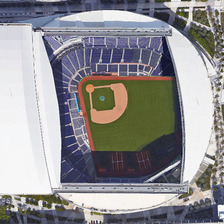

In [22]:
img = Image.open(path/"RSICD_images/stadium_1.jpg")
img

In [23]:
img = np.asarray(Image.open(path/'RSICD_images/stadium_1.jpg'))

In [24]:
img.shape

(224, 224, 3)

In [25]:
def read_image(filename):
    return np.asarray(Image.open(filename))

In [26]:
def add_image(example):
    return {'image':read_image(f"{path.as_posix()}/RSICD_images/{example['filename']}")}

In [27]:
import multiprocessing

multiprocessing.cpu_count()

96

In [28]:
import datasets

In [29]:
# ds1s = ds1.select(list(range(100)))

In [30]:
features = ds1.features.copy()
features["image"] = datasets.Array3D(shape=(224, 224, 3), dtype="uint8")

In [31]:
ds2 = ds1.map(add_image, features=features, num_proc=8)

CPU times: user 106 ms, sys: 57.2 ms, total: 163 ms
Wall time: 1min 31s


https://symbolize.stripped_domain/r/?trace=5f5a7f,7f1b1a69420f,90641f&map= 
*** SIGTERM received by PID 302853 (TID 302853) on cpu 0 from PID 302114; stack trace: ***
PC: @           0x5f5a7f  (unknown)  _PyFunction_Vectorcall
    @     0x7f1b07f81800        976  (unknown)
    @     0x7f1b1a694210  374269584  (unknown)
    @           0x906420  (unknown)  (unknown)
https://symbolize.stripped_domain/r/?trace=5f5a7f,7f1b07f817ff,7f1b1a69420f,90641f&map=2a762cd764e70bc90ae4c7f9747c08d7:7f1afb03f000-7f1b082c0280 
E0704 12:18:01.351995  302853 coredump_hook.cc:250] RAW: Remote crash gathering disabled for SIGTERM.
E0704 12:18:01.359137  302853 process_state.cc:771] RAW: Raising signal 15 with default behavior


In [32]:
ds2.features

{'filename': Value(dtype='string', id=None),
 'imgid': Value(dtype='int64', id=None),
 'sentences': [{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
   'raw': Value(dtype='string', id=None),
   'imgid': Value(dtype='int64', id=None),
   'sentid': Value(dtype='int64', id=None)}],
 'split': Value(dtype='string', id=None),
 'sentids': Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None),
 'image': Array3D(shape=(224, 224, 3), dtype='uint8', id=None)}

In [33]:
def show_example(e):
    img = e["image"]
    plt.imshow(img)
    sid = random.randint(0,5)
    plt.title(e['sentences'][sid]['raw'])
    plt.show()

filename railwaystation_134.jpg


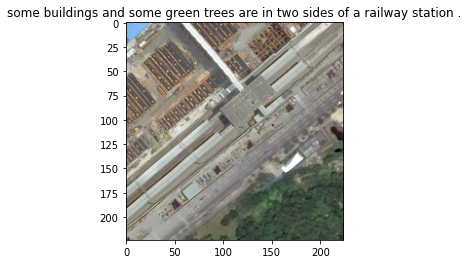

In [34]:
import random

id = random.randint(0, len(ds2)-1)
e = ds2[id]
print(f"filename {e['filename']}")
img = e["image"]
plt.imshow(img)
sid = random.randint(0,4)
plt.title(e['sentences'][sid]['raw'])
plt.show()

In [35]:
filenames = ds2['filename']

In [36]:
fn = filenames[0]
fn

'airport_1.jpg'

In [37]:
import re

In [38]:
pat = re.compile('(.*)_\d+.jpg')
res = pat.search(fn)
res, res.group(1)

(<re.Match object; span=(0, 13), match='airport_1.jpg'>, 'airport')

In [39]:
def extract_pat(s):
    res = pat.search(s)
    if res is None: return
    return res.group(1)

In [40]:
labels = [extract_pat(fn) for fn in filenames]
assert len(labels) == len(filenames)

In [41]:
from transformers import CLIPProcessor

In [42]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [43]:
e = ds2[0]
e.keys()

dict_keys(['filename', 'imgid', 'sentences', 'split', 'sentids', 'image'])

In [44]:
print(processor.__call__.__doc__)


        Main method to prepare for the model one or several sequences(s) and image(s). This method forwards the
        :obj:`text` and :obj:`kwargs` arguments to CLIPTokenizer's :meth:`~transformers.CLIPTokenizer.__call__` if
        :obj:`text` is not :obj:`None` to encode the text. To prepare the image(s), this method forwards the
        :obj:`images` and :obj:`kwrags` arguments to CLIPFeatureExtractor's
        :meth:`~transformers.CLIPFeatureExtractor.__call__` if :obj:`images` is not :obj:`None`. Please refer to the
        doctsring of the above two methods for more information.

        Args:
            text (:obj:`str`, :obj:`List[str]`, :obj:`List[List[str]]`):
                The sequence or batch of sequences to be encoded. Each sequence can be a string or a list of strings
                (pretokenized string). If the sequences are provided as list of strings (pretokenized), you must set
                :obj:`is_split_into_words=True` (to lift the ambiguity with a batch

In [45]:
e['sentences']

[{'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 0},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 1},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 2},
 {'tokens': ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  'raw': 'many planes are parked next to a long building in an airport .',
  'imgid': 0,
  'sentid': 3},
 {'t

In [46]:
n = 4
random_sentences  = []
for _ in range(n):
    idx = random.randint(0, len(ds2)-1)
    random_sentences.append(ds2[idx]['sentences'][0]['raw'])

In [47]:
image = np.array(e['image'])
sentences = [s['raw'] for s in e['sentences']]
# use 4 random sentences
sentences = sentences[0:1] + random_sentences

inputs = processor(text=sentences, images=image, return_tensors="jax", padding=True)

INFO:absl:Starting the local TPU driver.
INFO:absl:Unable to initialize backend 'tpu_driver': Not found: Unable to find driver in registry given worker: local://
INFO:absl:Unable to initialize backend 'gpu': Not found: Could not find registered platform with name: "cuda". Available platform names are: TPU Interpreter Host


In [48]:
for k,v in inputs.items():
    print(k, v.shape)

input_ids (5, 15)
attention_mask (5, 15)
pixel_values (1, 3, 224, 224)


In [49]:
from transformers import FlaxCLIPModel

model = FlaxCLIPModel.from_pretrained("openai/clip-vit-base-patch32")

In [50]:
outputs = model(**inputs)

In [51]:
sentences

['many planes are parked next to a long building in an airport .',
 'there is a wide river next to the factory .',
 'a football field is near several meadows and a basketball field .',
 'several boats are in a port with green ocean .',
 'many buildings and many green trees are in a medium residential area .']

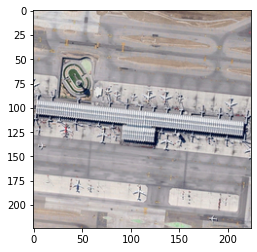

In [52]:
import matplotlib.pyplot as plt

plt.imshow(image);

In [53]:
outputs.logits_per_image

DeviceArray([[32.23153 , 17.978563, 16.967476, 20.768024, 19.519691]], dtype=float32)

In [104]:
jax.nn.softmax(outputs.logits_per_image, axis=-1)

DeviceArray([[8.2909983e-01, 9.6443787e-02, 6.6350028e-02, 2.2189088e-04,
              7.8844763e-03]], dtype=float32)

## Dataloader

In [ ]:
def data_loader(
    rng: jax.random.PRNGKey, dataset: Dataset, processor: CLIPProcessor, batch_size: int, shuffle: bool = False
):
    """
    Returns batches of size `batch_size` from truncated `dataset`, sharded over all local devices.
    Shuffle batches if `shuffle` is `True`.
    """
    steps_per_epoch = len(dataset) // batch_size

    if shuffle:
        batch_idx = jax.random.permutation(rng, len(dataset))
    else:
        batch_idx = jnp.arange(len(dataset))

    batch_idx = batch_idx[: steps_per_epoch * batch_size]  # Skip incomplete batch.
    batch_idx = batch_idx.reshape((steps_per_epoch, batch_size))

    for idx in batch_idx:
        batch = dataset[idx]

        ## read and process images here
        images = batch.pop("image_path")
        #         images = [Image.open(image_path).convert("RGB") for image_path in images]

        images = [read_image(image_path, mode=ImageReadMode.RGB) for image_path in images]

        if type(processor) == CLIPProcessor:
            batch["pixel_values"] = processor(images=images, return_tensors="jax").pixel_values
        else:
            batch["pixel_values"] = [processor(image).numpy() for image in images]

        batch = {k: jnp.array(v) for k, v in batch.items()}
        batch["pixel_values"] = jnp.transpose(batch["pixel_values"], (0, 2, 3, 1))

        batch = shard(batch)

        yield batch

In [ ]:
def data_loader(
    rng: jax.random.PRNGKey, dataset: Dataset, processor: CLIPProcessor, batch_size: int, shuffle: bool = False
):
    """
    Returns batches of size `batch_size` from truncated `dataset`, sharded over all local devices.
    Shuffle batches if `shuffle` is `True`.
    """
    steps_per_epoch = len(dataset) // batch_size

    if shuffle:
        batch_idx = jax.random.permutation(rng, len(dataset))
    else:
        batch_idx = jnp.arange(len(dataset))

    batch_idx = batch_idx[: steps_per_epoch * batch_size]  # Skip incomplete batch.
    batch_idx = batch_idx.reshape((steps_per_epoch, batch_size))

    for idx in batch_idx:
        batch = dataset[idx]

        ## read and process images here
        images = batch.pop("image_path")
        #         images = [Image.open(image_path).convert("RGB") for image_path in images]

        images = [read_image(image_path, mode=ImageReadMode.RGB) for image_path in images]

        if type(processor) == CLIPProcessor:
            batch["pixel_values"] = processor(images=images, return_tensors="jax").pixel_values
        else:
            batch["pixel_values"] = [processor(image).numpy() for image in images]

        batch = {k: jnp.array(v) for k, v in batch.items()}
        batch["pixel_values"] = jnp.transpose(batch["pixel_values"], (0, 2, 3, 1))

        batch = shard(batch)

        yield batch

### cifar10 ref

In [36]:
from datasets import load_dataset

In [38]:
cifar10 = load_dataset('cifar10', split='test')

Reusing dataset cifar10 (/root/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/951e017399fa3b30edfca56468a91ac6a03c9167c0b3f79367e777d1f9a0cf7e)


In [39]:
cifar10.features

{'img': Array3D(shape=(32, 32, 3), dtype='uint8', id=None),
 'label': ClassLabel(num_classes=10, names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], names_file=None, id=None)}

In [41]:
type(cifar10[0]['img'])

list

## UCM

In [ ]:
# !wget 

In [ ]:
import json

with open('/content/ucm_dataset.json') as f:
    ds = json.load(f)

JSONDecodeError: ignored

## Loading dataset using script

In [1]:
data_dir = "/home/shared/data"

script = "/home/arto/CLIP-rsicd/rsicd.py"

In [2]:
from datasets import load_dataset

In [3]:
%%time
ds = load_dataset(script, data_dir=data_dir)

Using custom data configuration default-data_dir=%2Fhome%2Fshared%2Fdata


0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset new_dataset downloaded and prepared to /home/shared/.cache/hf/datasets/new_dataset/default-data_dir=%2Fhome%2Fshared%2Fdata/0.1.0/6f1f8fdaa52ecdc9426b7016eb429130373ff87e5ded61852dfd17dd480f97a2. Subsequent calls will reuse this data.
CPU times: user 6min 31s, sys: 1min, total: 7min 31s
Wall time: 8min 8s


In [1]:
from datasets import load_dataset
data_dir = "/home/shared/data"
script = "/home/arto/CLIP-rsicd/rsicd.py"
ds = load_dataset(script, data_dir=data_dir)
# ds['train'][0]

Using custom data configuration default-data_dir=%2Fhome%2Fshared%2Fdata
Reusing dataset new_dataset (/home/shared/.cache/hf/datasets/new_dataset/default-data_dir=%2Fhome%2Fshared%2Fdata/0.1.0/6f1f8fdaa52ecdc9426b7016eb429130373ff87e5ded61852dfd17dd480f97a2)


{'filename': 'airport_1.jpg',
 'imgid': 0,
 'tokens': [['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport'],
  ['many',
   'planes',
   'are',
   'parked',
   'next',
   'to',
   'a',
   'long',
   'building',
   'in',
   'an',
   'airport']],
 'sentences': ['many planes are parked next to a long building in an airport .',
  'many planes are parked next to a long building in an airport .',
  'many planes are parked next to a long building in an airport .',
  'many planes are parked next to a long building in an air

In [6]:
%%time
for e in ds["train"]:
    pass

CPU times: user 4min 50s, sys: 500 ms, total: 4min 50s
Wall time: 4min 50s


In [26]:
from transformers import CLIPProcessor
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
import numpy as np
def preprocessing_function(examples):
    images = []
    captions = []
    # TODO: figure out if we need to extend number of images to number of captions
    for image, sentences in zip(examples['image'], examples['sentences']):
        images.extend([np.array(image).transpose(2, 0, 1)]*len(sentences))
        captions.extend(sentences)
    return processor(text=captions, images=images, return_tensors="np", padding="max_length", max_length=64, truncation=True)

2021-07-11 21:23:02.851925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-11 21:23:02.851959: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [27]:
processor.tokenizer

PreTrainedTokenizer(name_or_path='openai/clip-vit-base-patch32', vocab_size=49408, model_max_len=77, is_fast=False, padding_side='right', special_tokens={'bos_token': AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'eos_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'unk_token': AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True), 'pad_token': '<|endoftext|>'})

In [ ]:
# preprocessed_dataset = ds.map(
#     preprocessing_function,
#     batched = True,
#     batch_size=100,
#     num_proc=16,
#     remove_columns=ds['train'].column_names,
# )

5
5
10
5
15
5
20
5
25
5
5
5
30
5
10
5
35
5
15
540

5
20
5
45
5
25
5
50
5
30
5
55
5
35
5
60
5
40
5
65
5
45
705

5
7550

55

8055

55

60855

55


5
65
905

55
10
5

5
70
5
95
5
15
5
10
5
75
5
5100
5
20
5
155
5

5

5
80
5
105
5
25
5
20
105

5
10
5
85
5
110
530

5
2515

55

15
5
90
5
11535

55

2030

55

20
5
595
5

5
12040

55

2535

55

25
5
100
5
1012545


555


30
405

5
30
5
5105
5
13050

15
55

5
5

35
5
45
5
535
5

5
5110
5

13555205


10
555



5
40
5
50
5
40
5
10
5
115
5
6014025
10

5
55
515



5
45
5
55
5
45
5
15
5
120
5
65
305145


201555



55

50
5
60
5
50
5
20
55
125
5

570

5
352520150



5555



55
5
65
5
55
5
25
5
130
755
10
5

5
2530

1554055



55

60
5
7060

55

30
5
135
5
15
8030355



516055



455

5
65
5
65
755

5
35
5
140
205
35
585


4055165



5505


5
70
5
70
5
80
5
40
5
14525

5540

90

4551705



55
55

5
75
755

5
85
5
45
5
30150

55
95
4550
175

5
555

60


5
8080

555

90
5

5
50
5
35155

55

10055
501805


6555
5



5
8585

55

95
5
10
5
55
5
16040

55
60

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [46]:
samples = ds['train'][:16]

In [47]:
batch = preprocessing_function(samples)

In [39]:
import jax.numpy as jnp
from flax.training.common_utils import shard

In [40]:
batch = {k: jnp.array(v) for k, v in batch.items()}
# batch = shard(batch)

In [34]:
from transformers import FlaxCLIPModel
model = FlaxCLIPModel.from_pretrained(
            "openai/clip-vit-base-patch32", seed=0, dtype=getattr(jnp, "bfloat16")
        )

In [48]:
batch['input_ids'].shape

(80, 64)

In [49]:
batch["attention_mask"].shape

(80, 64)

In [50]:
batch["pixel_values"].shape

(80, 3, 224, 224)

In [51]:
model(**batch)

FlaxCLIPOutput(logits_per_image=DeviceArray([[32.42188 , 32.42188 , 32.42188 , ..., 30.859377, 30.859377,
              30.859377],
             [32.42188 , 32.42188 , 32.42188 , ..., 30.859377, 30.859377,
              30.859377],
             [32.42188 , 32.42188 , 32.42188 , ..., 30.859377, 30.859377,
              30.859377],
             ...,
             [32.226566, 32.226566, 32.226566, ..., 31.445314, 31.445314,
              31.445314],
             [32.226566, 32.226566, 32.226566, ..., 31.445314, 31.445314,
              31.445314],
             [32.226566, 32.226566, 32.226566, ..., 31.445314, 31.445314,
              31.445314]], dtype=float32), logits_per_text=DeviceArray([[32.42188 , 32.42188 , 32.42188 , ..., 32.226566, 32.226566,
              32.226566],
             [32.42188 , 32.42188 , 32.42188 , ..., 32.226566, 32.226566,
              32.226566],
             [32.42188 , 32.42188 , 32.42188 , ..., 32.226566, 32.226566,
              32.226566],
             ...,